In [1]:
patid = '231'

In [2]:

import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator

from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import jj_basic_fn as JJ
from sklearn import ensemble
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools

#matrix inverse
from numpy.linalg import inv

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
def get_ml_data(dat, patid, test_size = 0.2, if_stimulated = 'all', if_scaler = 0, if_remove_icd = 1):
    dat = dat.loc[dat.loc[:,'patid'] == patid]
    y = dat.loc[:,'label']
    drop_list = ['label', 'region_start_time', 'patid', 'epoch', 'if_stimulated']
    if if_remove_icd:
        drop_list.append('i12')
        drop_list.append('i34')
    X = dat.drop(drop_list, axis = 1, inplace = False)
    
    y=y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    if if_scaler:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)    
    
        
    return X_train, X_test, y_train, y_test






In [4]:
import pickle
data = pickle.load( open( "../data/ml_ready_data.p", "rb" ) )
data = JJ.remove_outliers(data)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

data

region_start_time      delta1       delta2      delta3  \
86   2016-02-14 03:59:36.960000000  61.166778   273.677298   33.567358    
87   2016-02-15 20:59:18.960000000  40.548973   773.155101   25.976912    
88   2016-02-16 20:59:12.998400000  41.771439   172.179808   32.841170    
89   2016-02-18 03:58:56.006400000  42.171886   290.146546   36.623015    
90   2016-02-19 03:58:42.960000000  45.669293   290.906731   25.191819    
91   2016-02-25 20:57:42.019200000  40.690762   143.452763   20.017653    
92   2016-02-27 03:57:25.027200000  46.372228   197.027519   59.479692    
93   2016-02-27 15:57:23.040000000  48.966374   181.547346   28.612515    
94   2016-03-02 03:56:47.011200000  37.949515   177.184680   25.164441    
95   2016-03-02 20:56:43.008000000  46.809814   141.505547   16.087615    
96   2016-03-04 20:56:24.000000000  42.157414   188.767975   34.026946    
97   2016-03-05 15:56:19.968000000  84.252391   252.561013   29.576891    
98   2016-03-08 20:55:45.033600000  50.323683   158.534674   18.777339    
99   2016-03-10 15:59:55.968000000  46.998675   164.697988   30.949210    
100  2016-03-10 20:59:54.988800000  55.871792   266.037194   31.351151    
101  2016-03-12 03:59:37.996800000  68.990792   305.195616   32.468458    
102  2016-03-14 16:59:17.980800000  65.997526   427.791425   34.798352    
103  2016-03-14 21:59:17.001600000  55.264296   308.671274   25.325793    
104  2016-03-15 04:59:15.993600000  67.530390   358.303551   44.562511    
105  2016-03-18 04:58:41.001600000  68.057148   529.444920   44.842743    
106  2016-03-19 04:58:35.990400000  50.947063   533.069118   37.515211    
107  2016-03-19 16:58:34.003200000  63.557089   710.530464   27.568270    
108  2016-03-20 04:58:21.993600000  45.823193   235.610829   49.879446    
109  2016-03-20 16:58:18.969600000  57.767851   307.638434   34.215513    
110  2016-03-21 04:58:16.982400000  49.677060   368.814571   46.627011    
111  2016-03-22 04:58:02.985600000  55.375656   324.571389   34.245552    
112  2016-03-23 16:57:55.036800000  61.159452   189.289764   44.513485    
113  2016-03-23 21:57:53.971200000  108.044944  320.529165   116.373205   
114  2016-03-27 04:57:19.008000000  53.472483   1282.248249  44.077318    
115  2016-03-28 04:57:03.024000000  63.176756   420.612921   91.010445    
116  2016-03-29 16:56:56.025600000  60.110746   137.248436   34.124594    
117  2016-03-30 04:56:44.016000000  46.050200   320.052671   31.743196    
118  2016-03-30 21:56:40.963200000  100.943146  447.471237   131.010091   
119  2016-03-31 04:56:40.041600000  58.756557   269.088231   35.209030    
120  2016-04-02 16:56:18.009599999  44.320569   147.930741   28.067305    
121  2016-04-02 21:56:15.993600000  58.797900   187.420742   54.831128    
122  2016-04-05 04:55:46.041600000  55.925195   296.821210   45.512333    
123  2016-04-12 04:54:44.006400000  35.764041   205.001914   28.783201    
124  2016-04-12 21:54:40.003200000  100.466362  518.906235   70.989698    
125  2016-04-13 04:54:28.972800000  51.318574   223.533100   60.403359    
126  2016-04-15 04:54:07.977600000  52.432745   327.896935   37.147473    
127  2016-04-16 21:54:01.036800000  129.591714  615.484616   157.508187   
128  2016-04-17 21:53:46.003200000  106.683834  418.928417   91.039761    
129  2016-04-20 16:53:22.963200000  139.329508  608.597032   60.972621    
130  2016-04-20 21:53:21.984000000  38.993919   268.909875   24.282264    
131  2016-04-21 21:53:07.987200000  45.267670   242.933125   31.417771    
132  2016-04-22 21:53:02.025600000  83.577101   829.724754   84.842743    
133  2016-04-23 04:52:50.995200000  88.589986   314.610273   131.470415   
134  2016-04-25 16:52:30.000000000  74.734955   243.445680   30.979263    
135  2016-04-27 16:00:02.016000000  85.635006   224.228576   46.994494    
136  2016-05-02 03:59:08.016000000  59.363736   394.623819   38.569400    
137  2016-05-04 03:58:49.958400000  76.950464   416.965929   82.366914    
138  2016-05-04 20:58:46.992000000  52.552

### What the data looks like

### trainning data (consists of 7 bandwidths in four channels, total 28 features)

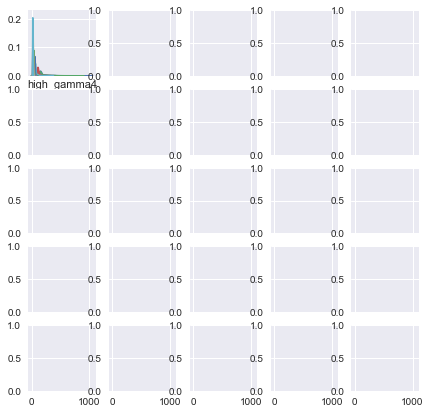

In [5]:
# plot
f, axes = plt.subplots(5, 5, figsize=(7, 7), sharex=True)
drop_list = ['label','all1', 'all2', 'all3', 'all4']
data_ml = JJ.get_scatter_plot_data(data, patid, drop_list = drop_list)
for var in list(data_ml.columns):
    sns.distplot(data_ml[var], ax=axes[0, 0])


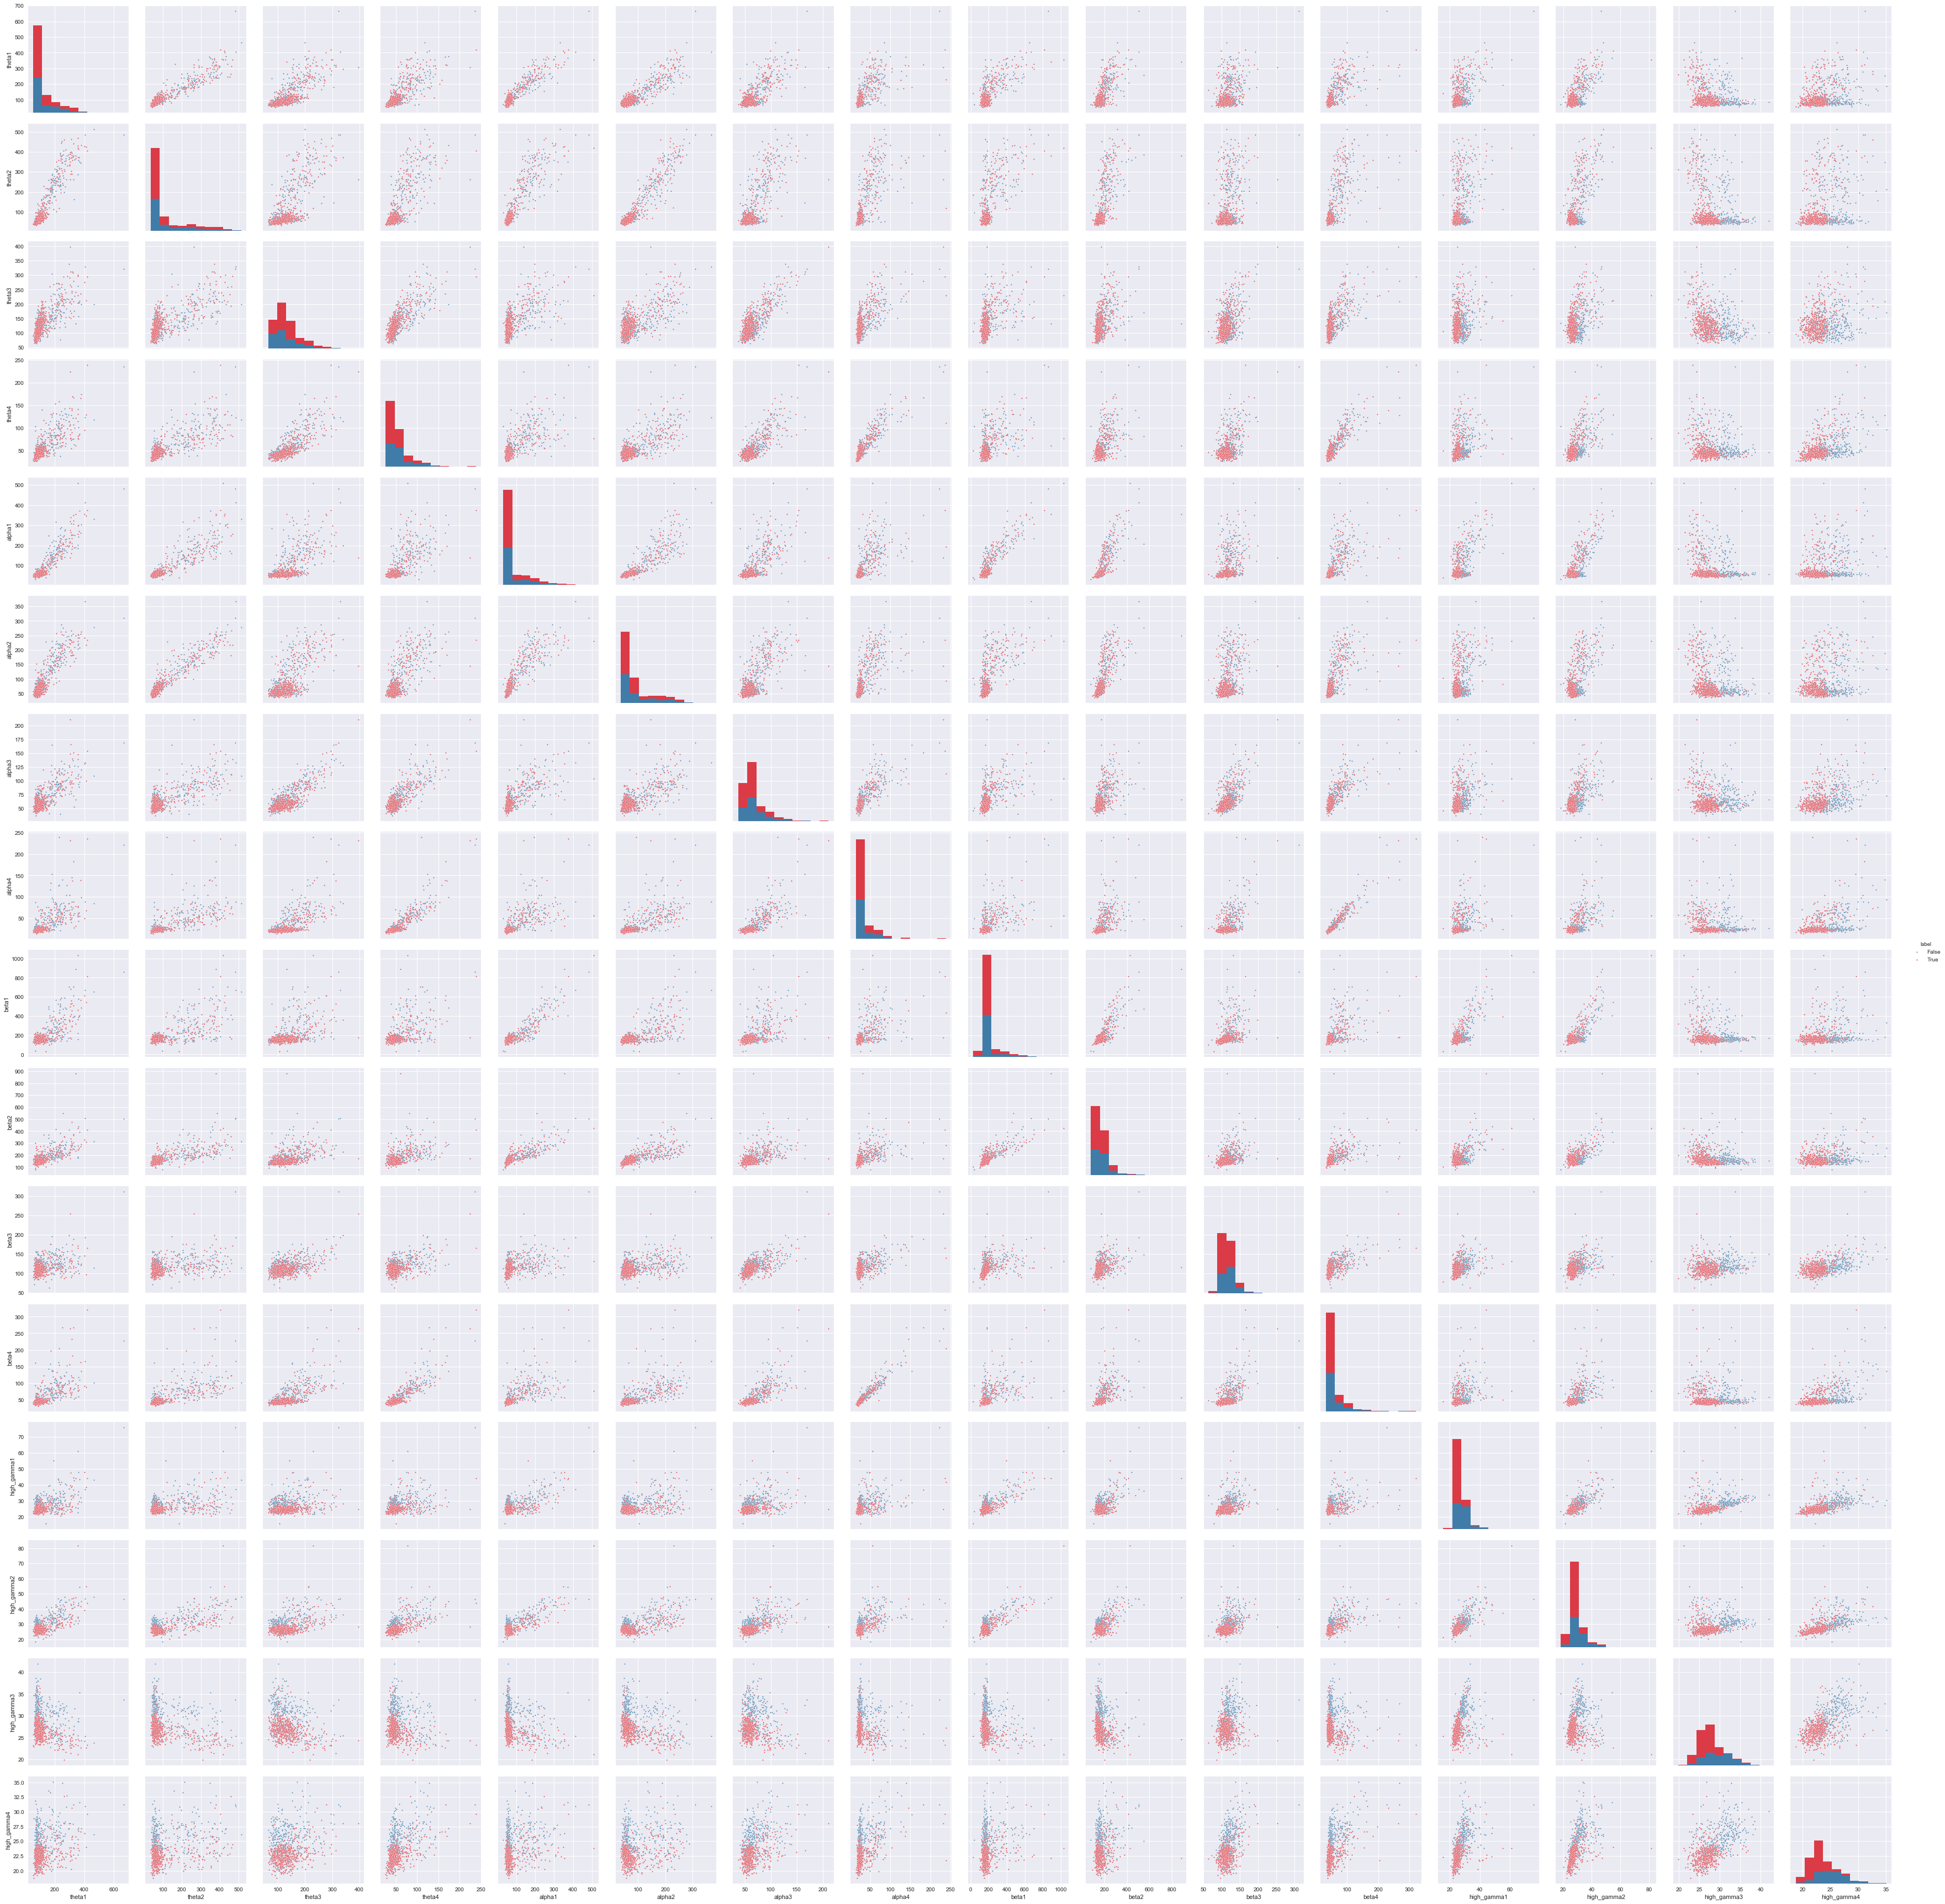

In [6]:
#drop_list = ['all1', 'all2', 'all3', 'all4', 'high_gamma1', 'high_gamma2', 'high_gamma3', 'high_gamma4', 'alpha1', 'alpha2', 'alpha3', 'alpha4']
#data_ml = JJ.get_scatter_plot_data(data, patid, drop_list = drop_list)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.ioff()
data_ml = JJ.get_scatter_plot_data(data, patid)
sns.pairplot(data_ml, hue="label", size = 3, vars=JJ.get_variable_name(['theta', 'alpha','beta', 'high_gamma']), plot_kws={"s": 5},palette=sns.diverging_palette(240, 10, n=2))
plt.show()

### Fitting 7 classfier to the training data and tune the hyperparameter using 10-fold cross-validation. Evaluate the performance of each classifier using test data

### 1:'Logistic Regression' (regulation type, regulation parameter)
### 2: 'SVM' (kernel type, degreee, regulation type, regulation parameter)
### 3: 'Gaussian Naive Bayes classifier'
### 4:'Linear Discriminant Analysis'
### 5:'Decision Tree' (criterion for splliting, max depth, min sample per leaf)
### 6:'Random Forest' (criterion for splliting, number of trees, number of features used in each  tree, max depth, min sample per leaf)
### 7:'Gradient Boosting' (number of estimator, number of samples used in each estimator, max depth, min sample per leaf, learning rate)


## Classifier Performance

### The confusion matrix and ROC of Logistic Regression

Confusion matrix, without normalization


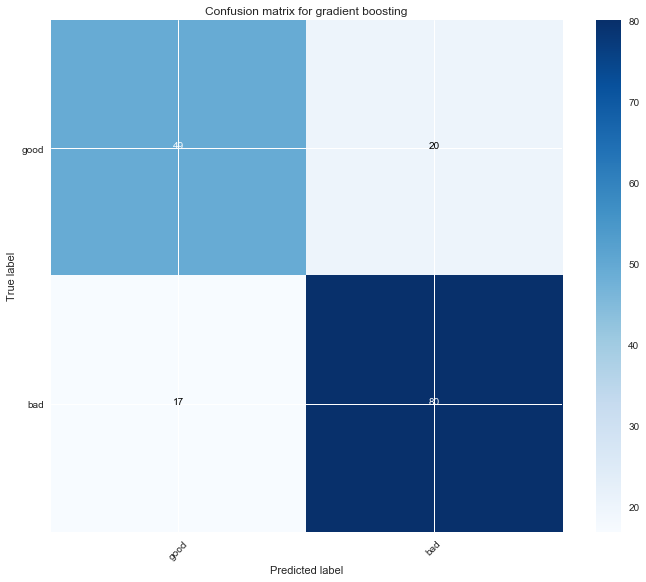

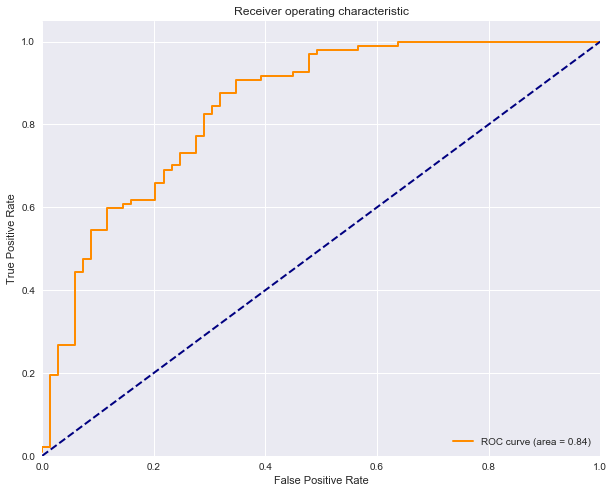

In [7]:
X_train, X_test, y_train, y_test = get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)

JJ.estimator_performance(7, X_test, y_test, patid = patid, if_plot_c = 1, if_plot_roc = 1)

### Performace Overview of each Classifier

In [8]:
X_train, X_test, y_train, y_test = get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)

JJ.scores_estimators(X_test, y_test, patid = patid)

{'SVM': 0.82738095238095233, 'decision tree': 0.80750915750915753, 'Logistic Regression': 0.81739926739926738, 'gradient boosting': 0.86153846153846159, 'random forest': 0.85073260073260071}


Classifier       AUC
0  gradient boosting    0.861538
1  random forest        0.850733
2  SVM                  0.827381
3  Logistic Regression  0.817399
4  decision tree        0.807509

Classifier  Accuracy
0  gradient boosting    0.777108
1  random forest        0.771084
2  SVM                  0.740964
3  Logistic Regression  0.722892
4  decision tree        0.704819

### ROC curve for all classifiers

<IPython.core.display.Javascript object>


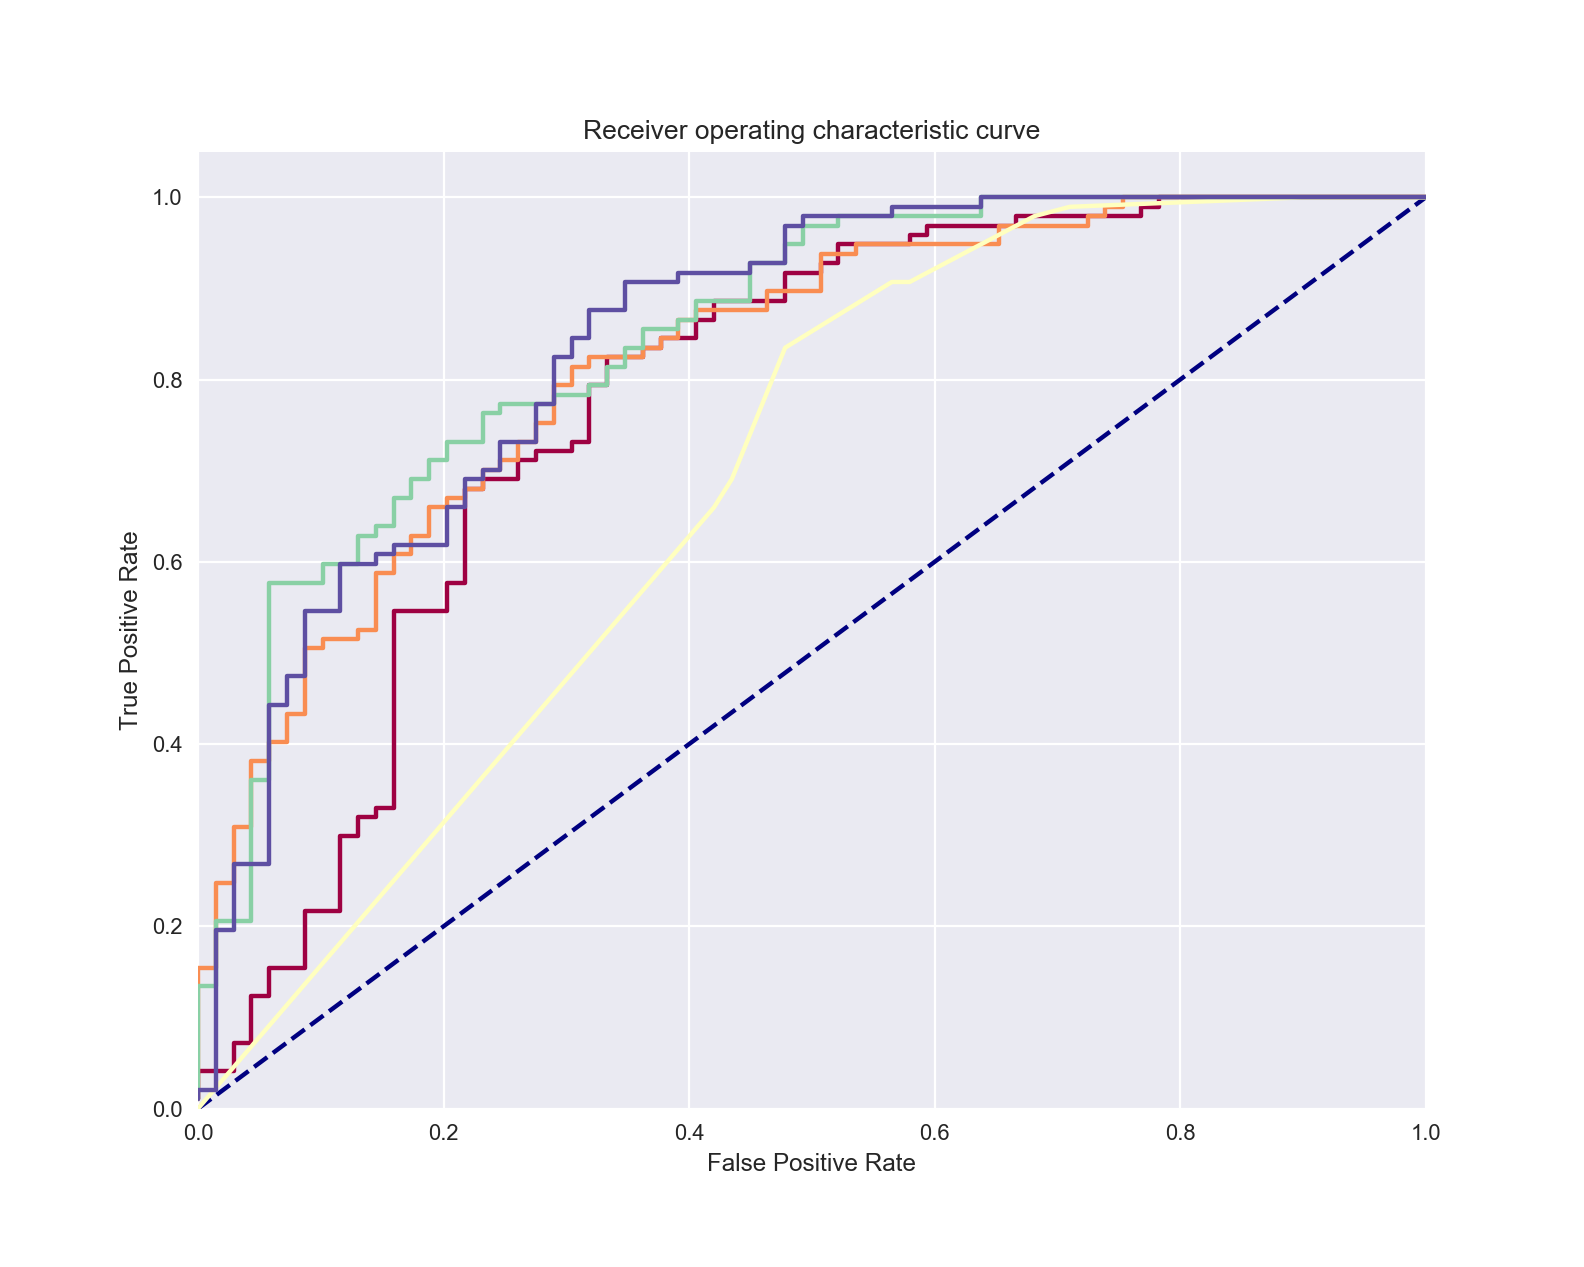

In [16]:
JJ.plot_roc_all(X_test, y_test, patid = patid)

### Ensemble SVM, Logistic Regression, Random Forest and Gradient Boosting

In [10]:

X_train, X_test, y_train, y_test = get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)
#parameter_tuning(X_train, X_test, y_train, y_test, classifier = 1, C_range_num = 100, if_save = 1)

print("The accuracy for ensemble model is")
JJ.ensemble_model(X_train, y_train, X_test, y_test, patid = patid,if_save = 0)

The accuracy for ensemble model is
0.777108433735


## Feature Importance

### Feature Importance fop Logistic regression

<IPython.core.display.Javascript object>


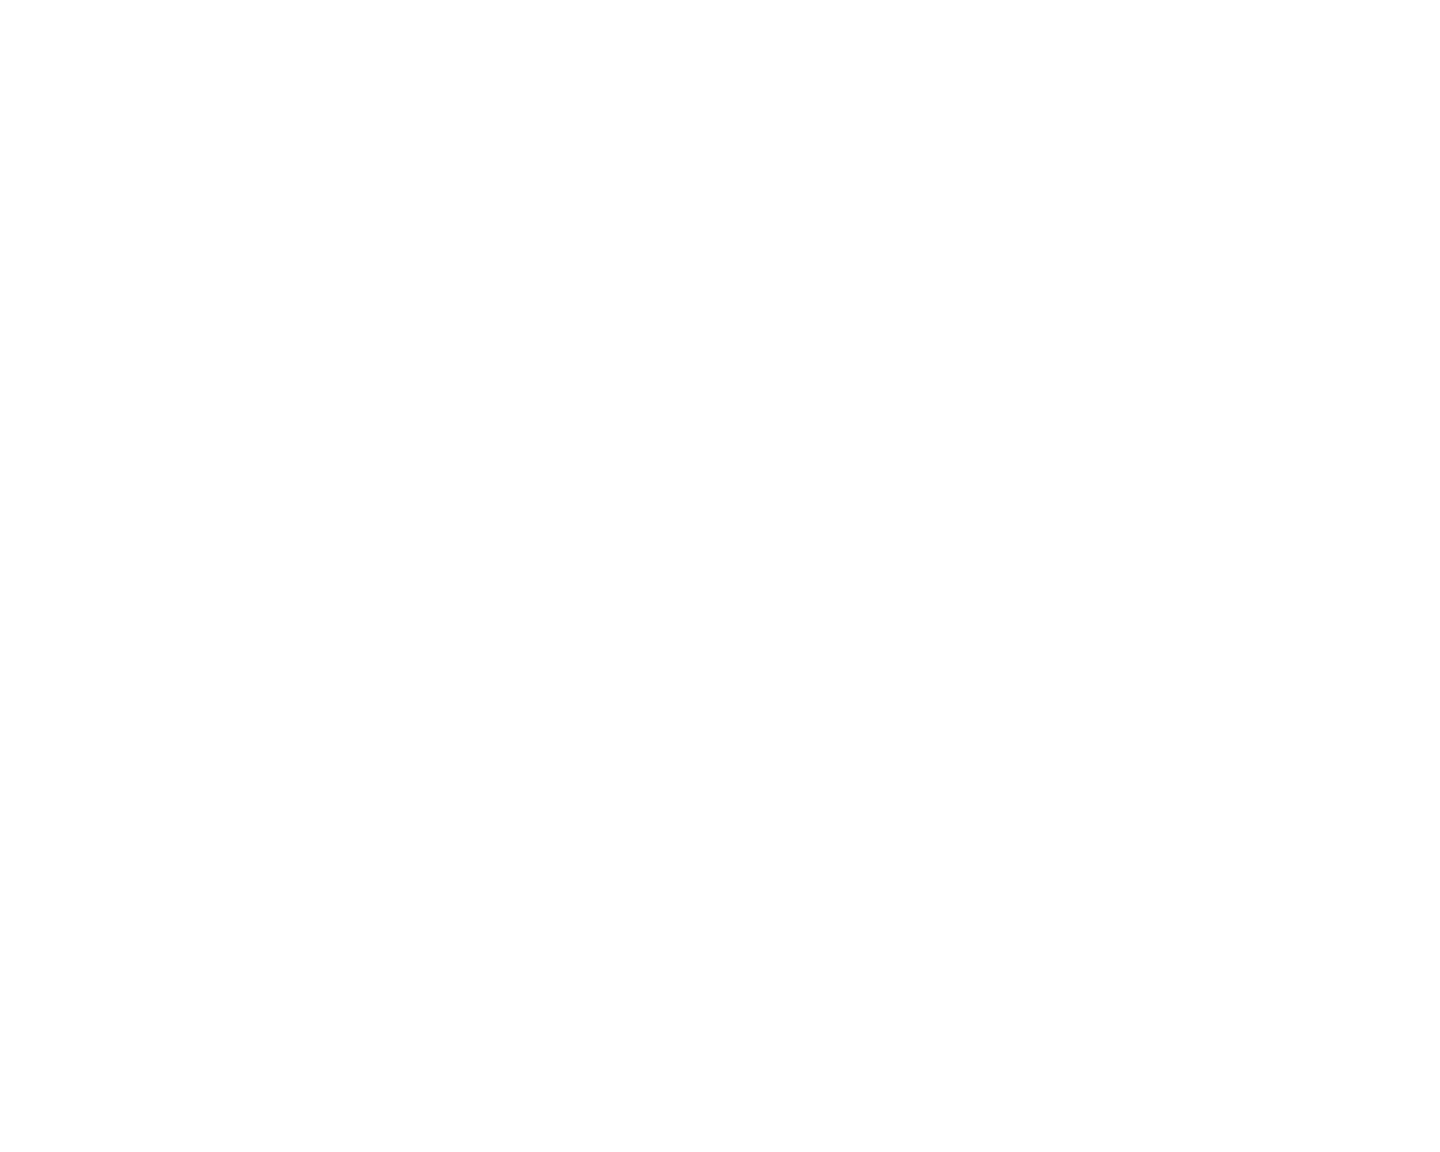

<IPython.core.display.Javascript object>


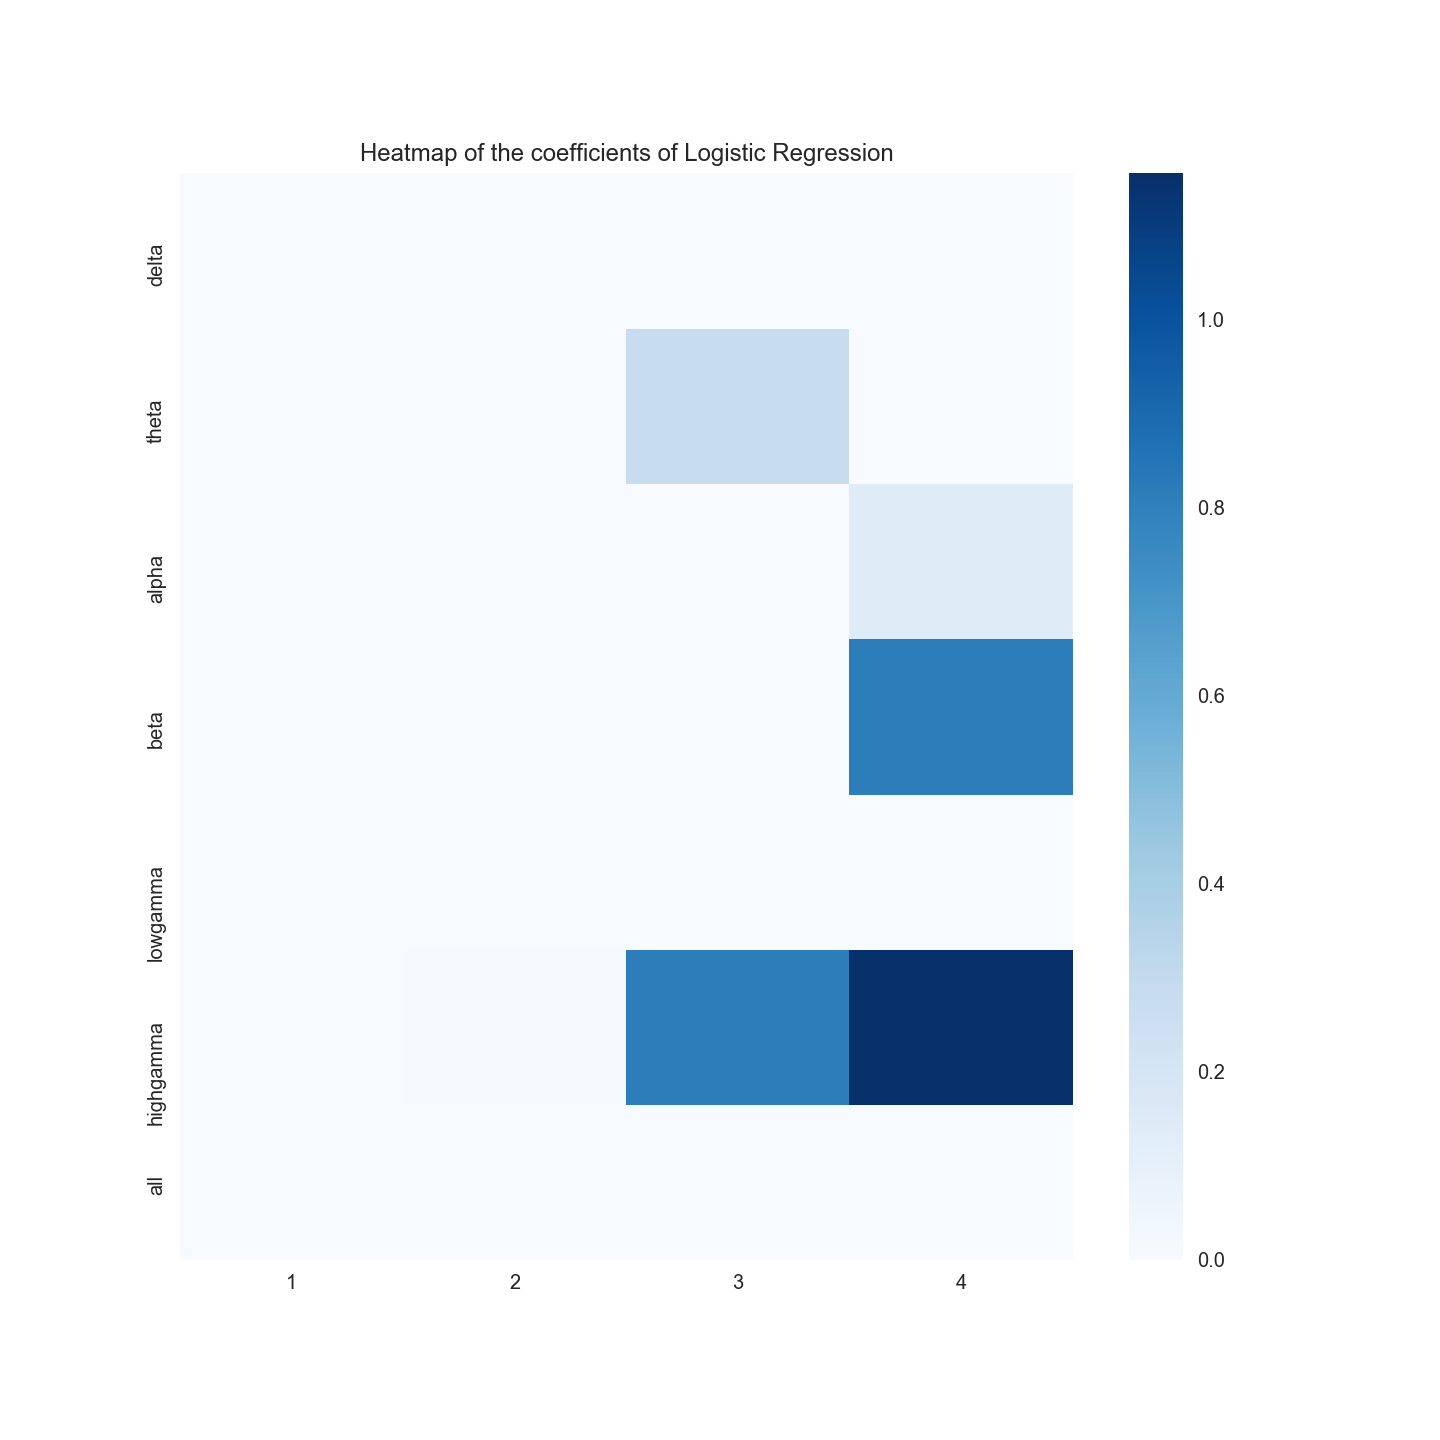

In [22]:
import matplotlib.pyplot as plt

prepath = '../estimators/'+patid + '/'
classifier_int = 1
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open(prepath + 'best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.coef_.reshape(7,4))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all'][::-1]
channel = ['1', '2', '3', '4']
df = pd.DataFrame(coef, index = powerband, columns = channel)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the coefficients of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
sns.plt.show()

### Feature Importance fop Gradient Boosting

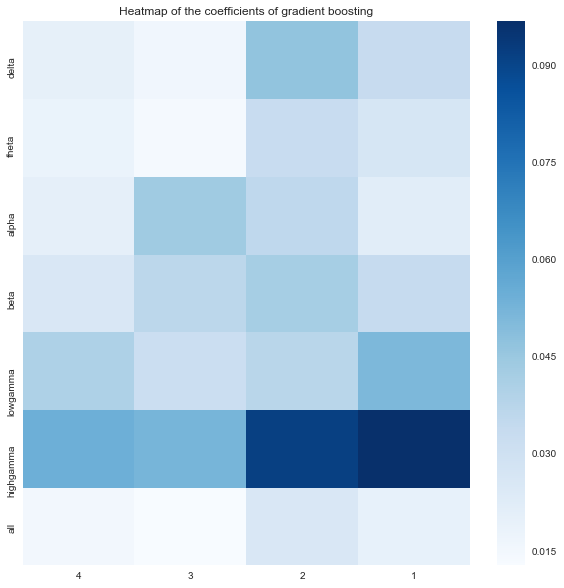

In [12]:
import matplotlib.pyplot as plt

prepath = '../estimators/'+patid + '/'
classifier_int = 7
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open(prepath + 'best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.feature_importances_.reshape(7,4))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all'][::-1]
channel = ['4', '3', '2', '1']
df = pd.DataFrame(coef, index = powerband, columns = channel)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the coefficients of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
sns.plt.show()

### Next step: scatter plot between important features, investigate other features importance methods, fit data of other patients, investigate the influence of parametes of the device on the

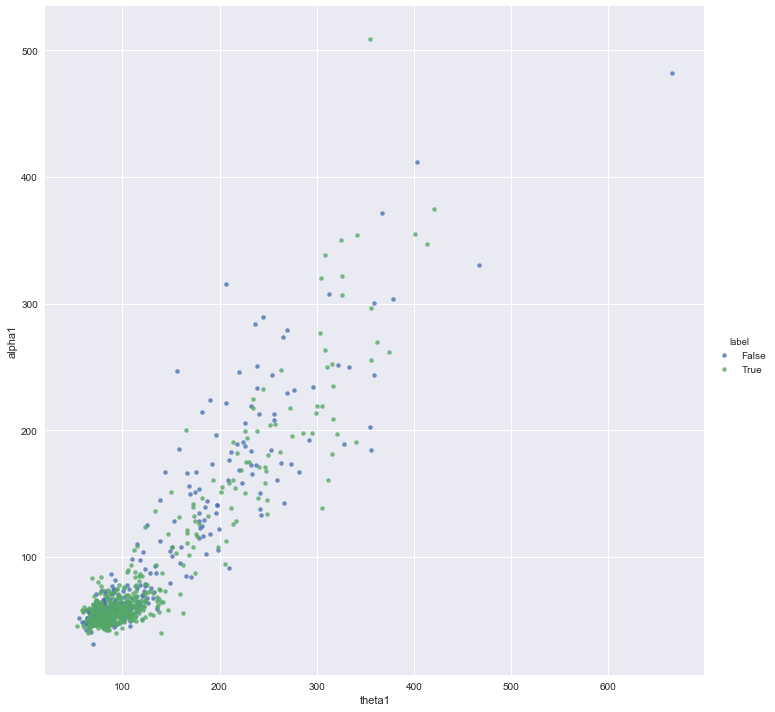

In [23]:
%matplotlib inline

keep_list = ['theta1', 'alpha1','patid', 'label']
select_dict = {'patid' : patid}
data_s = JJ.select_data(data, select_dict = select_dict, keep_list = keep_list)
sns.lmplot(x= 'theta1', y = 'alpha1', data=data_s, hue = 'label', fit_reg=False, size = 10, scatter_kws={"s": 20})
plt.show()


<IPython.core.display.Javascript object>


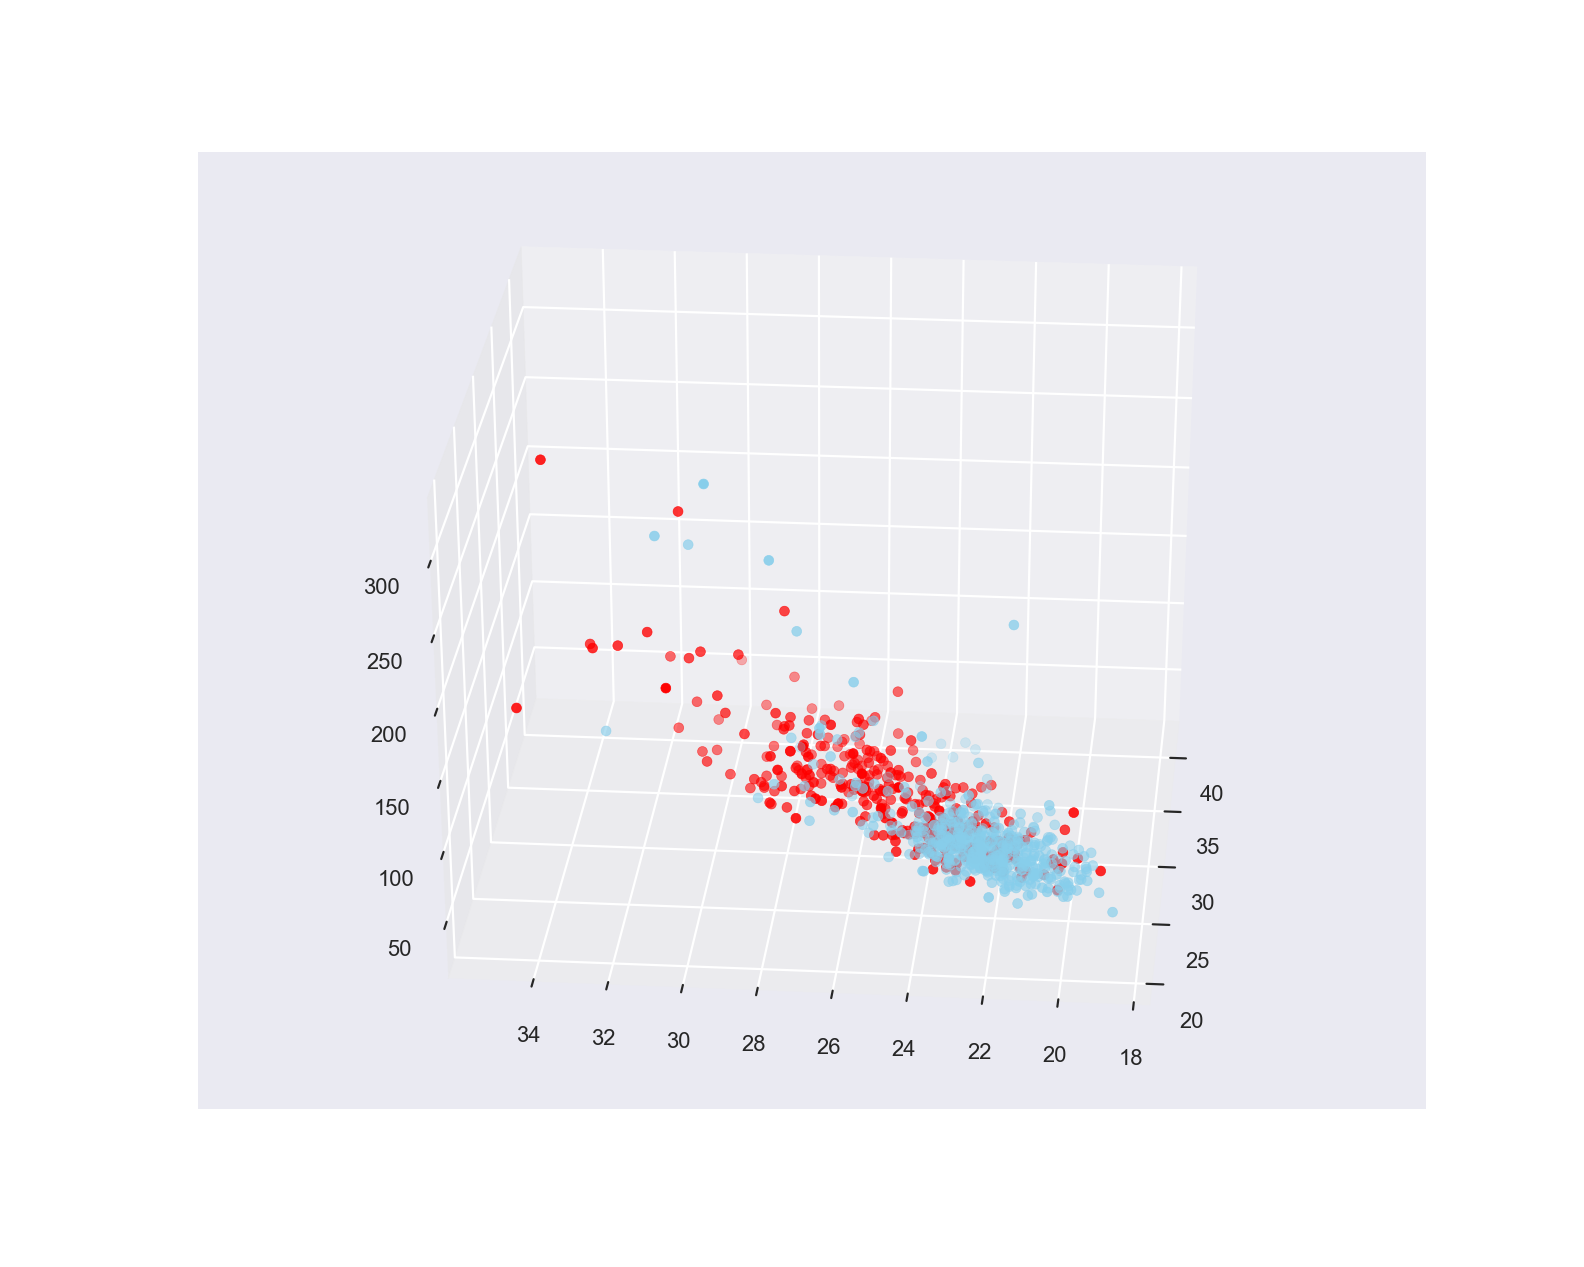

In [19]:
%matplotlib notebook

JJ.scatter_plot_3d(data,patid,'high_gamma3', 'high_gamma4','beta4')
